## This notebook discusses Agglomerative Clustering 
1. Definition and Details
2. Intuitions
3. Run Time complexity 
4. Hyperparameters
5. Application in Python
6. Visualizations - using different sample datasets
7. Usecases, Advantages and Disadvantages


Hierachical clustering works by grouping data into a tree of clusters. There are two types of hierarchical clustering

1. Agglomerative Clustering / AGNES
2. Divisive Clustering

**Agglomerative**:  Initially, each data object is its own cluster. At each iteration, the clusters are combined with different clusters in  a bottom-up approach until a single cluster is formed. Do note that this also works on the basis of distance.

**Time Complexity**: $ O(n^2 \log(n)) $

**How are the clusters combined?**
1. Single Linkage : The distance between two clusters is the shortest distance between two points in each cluster
2. Complete Linkage : The distance between two clusters is the longest distance between two points in each cluster
3. Average Linkage : The distance between clusters is the average distance between each point in one cluster to every point in other cluster
4. Ward Linkage : You define centroids for each cluster. Calculate distance between points and their centroids before merging and after merging clusters. Combine clusters with least (after - before) distances.

**Dendograms** : These are the tree shaped structured formed from hierarchical clustering. Dendograms are useful in deciding the optimal no of clusters.


**Extra Info** : https://www.javatpoint.com/hierarchical-clustering-in-machine-learning

# Application in Python

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import seaborn as sns

In [3]:
## Making 5 2D blobs
X, y, centers = make_blobs(n_samples=2000, centers=5, n_features=2,random_state=0,cluster_std = 0.5, return_centers = True)
np.shape(X), np.shape(y), np.shape(centers)


((2000, 2), (2000,), (5, 2))

<AxesSubplot:xlabel='xaxis', ylabel='yaxis'>

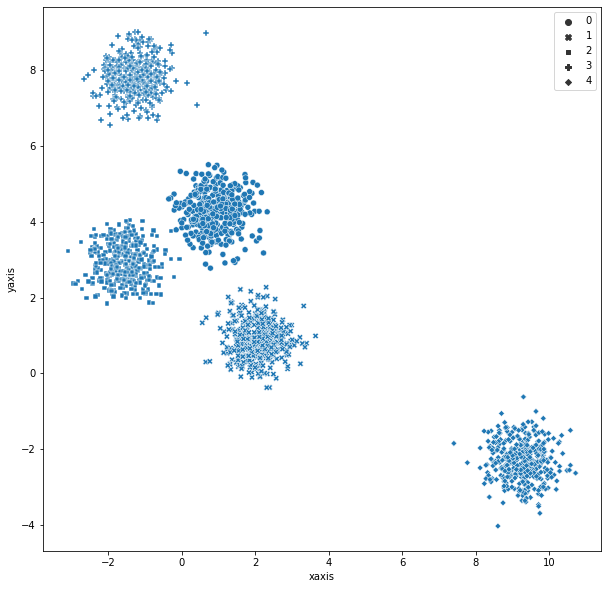

In [4]:
plt.rcParams["figure.figsize"] = [10, 10]
data_df = pd.DataFrame(X, columns = ['xaxis', 'yaxis'])
sns.scatterplot(data=data_df, x="xaxis", y="yaxis", style= y 
               )

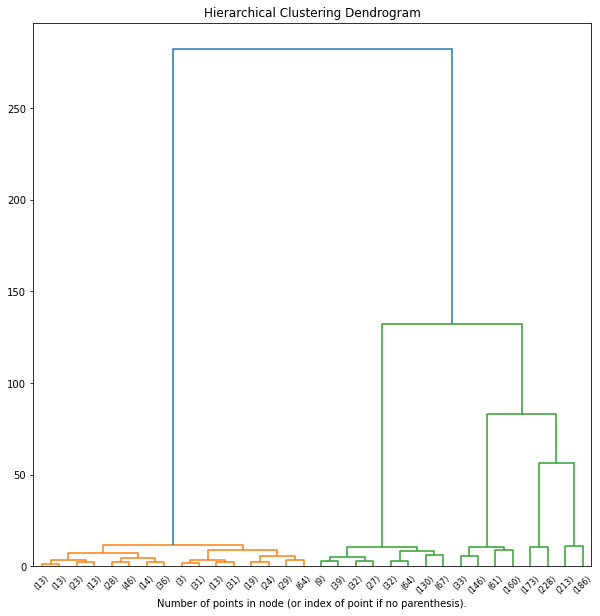

In [7]:
# Plotting the dendogram
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top fours levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p = 4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [8]:
## from the dendogram, I've no of clusters = 5

In [9]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(linkage = 'ward', n_clusters = 5)
ac.fit(X)

AgglomerativeClustering(n_clusters=5)

<AxesSubplot:xlabel='xaxis', ylabel='yaxis'>

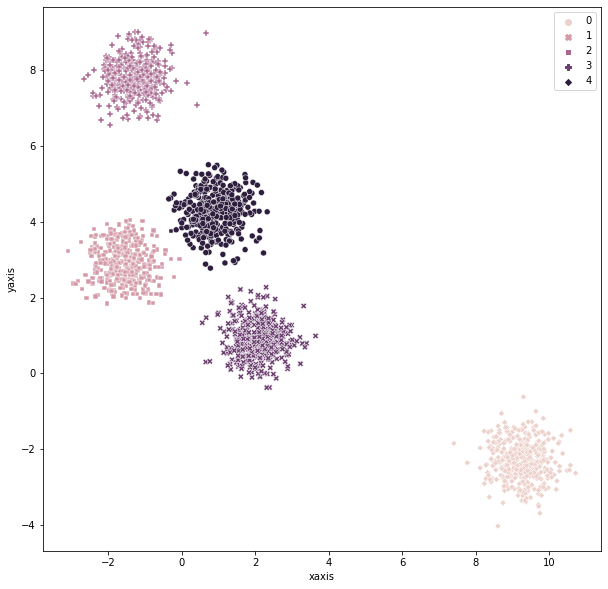

In [10]:
sns.scatterplot(data=data_df, x="xaxis", y="yaxis", hue= ac.labels_ , style=y)

class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

Text(0.5, 1.0, 'ward')

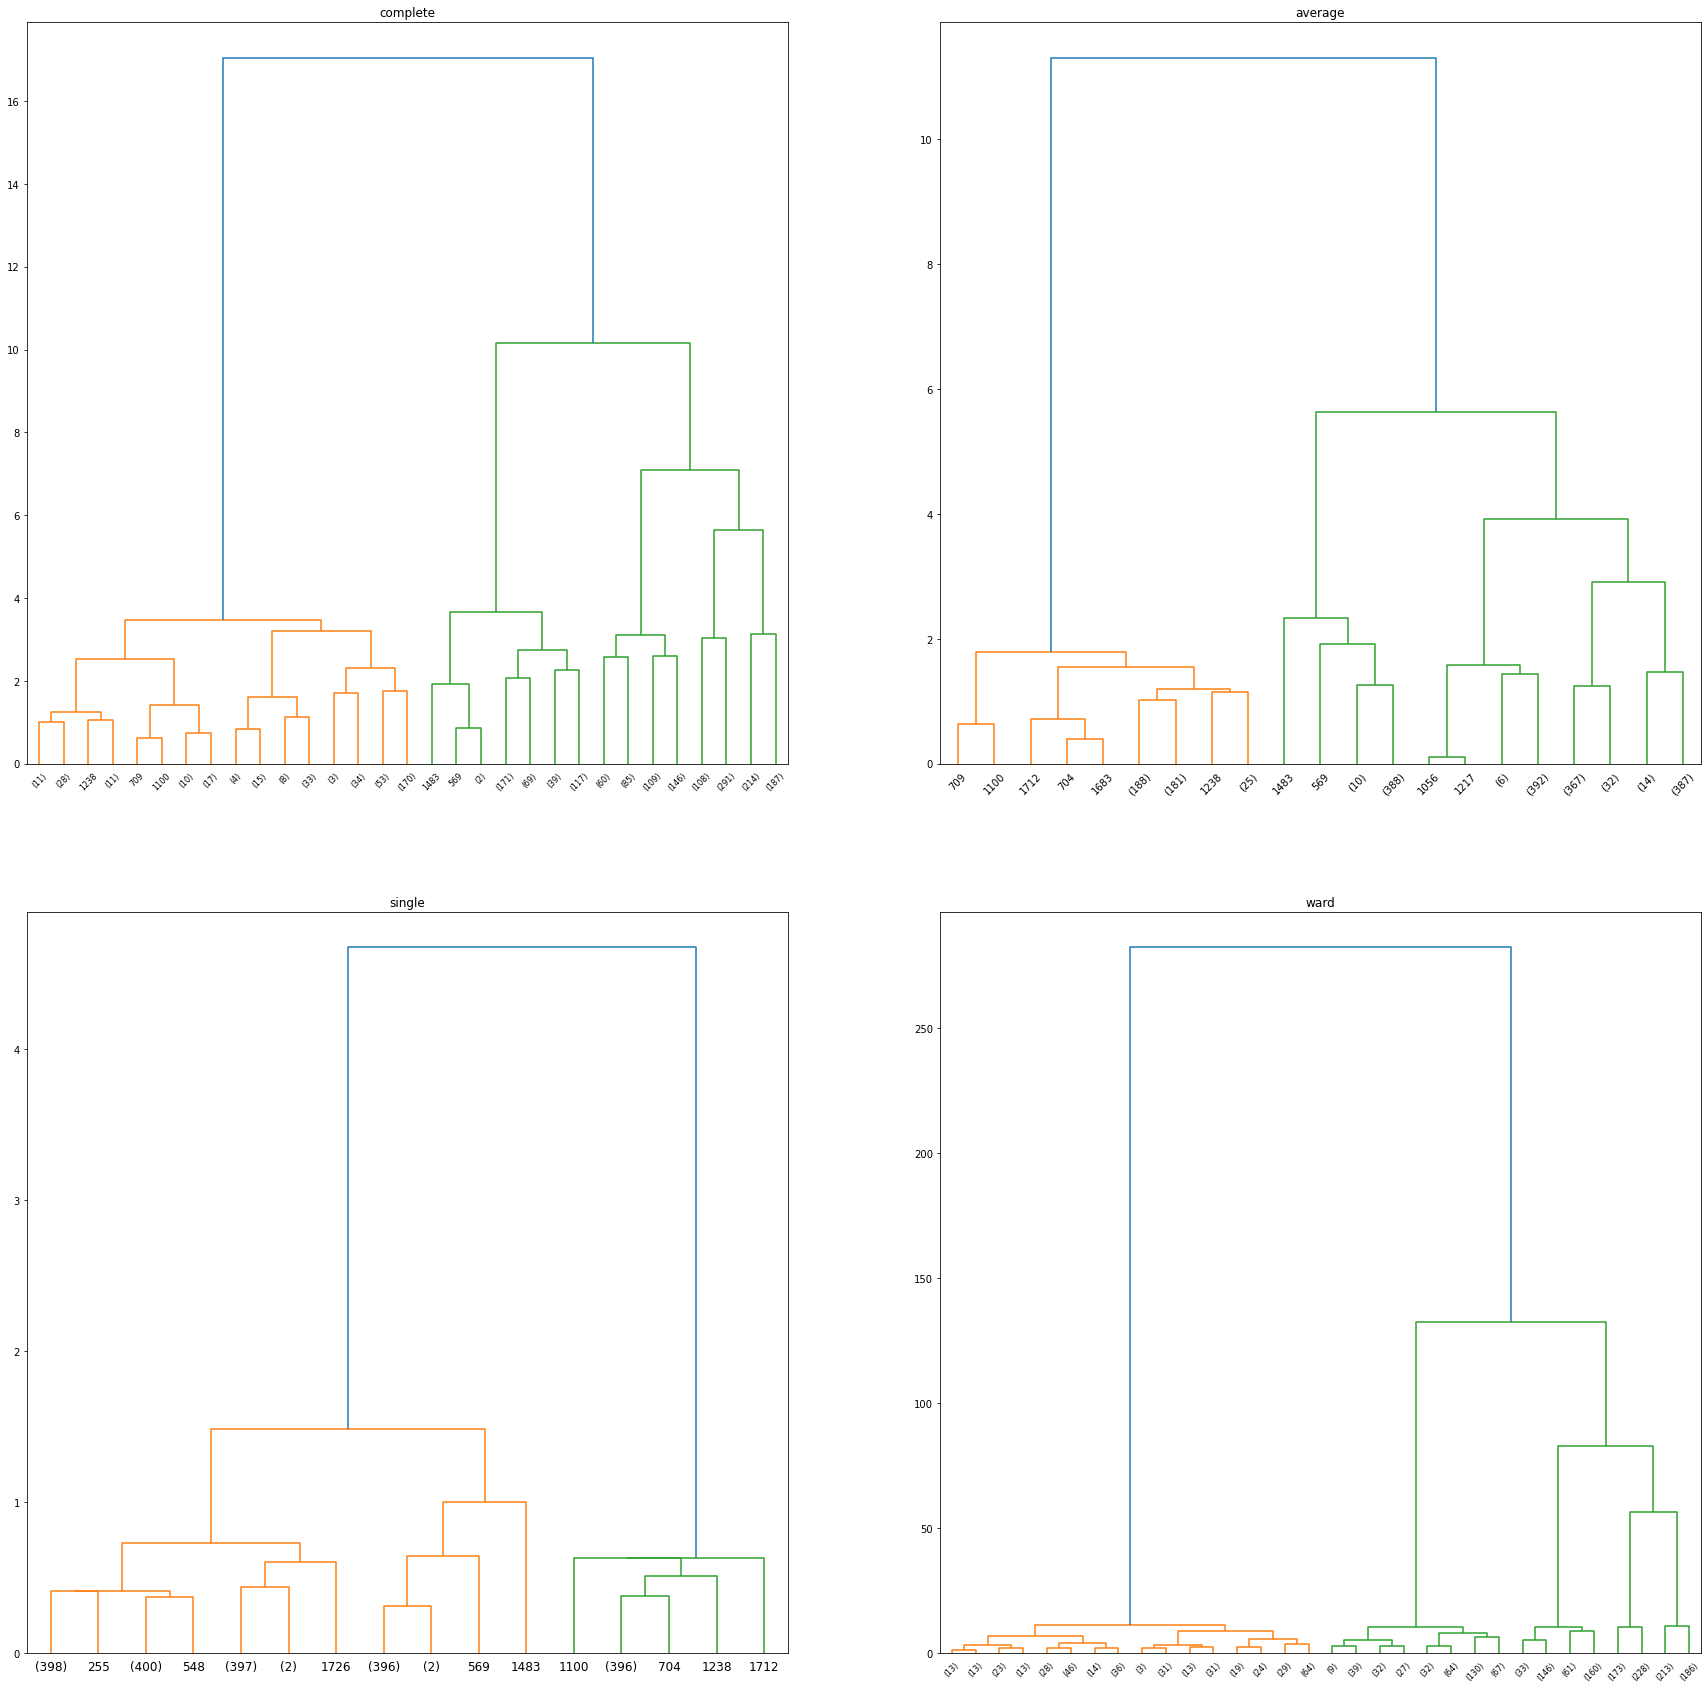

In [11]:
## How do linkage and metric change the clustering?

linkages = ['complete', 'average', 'single' ,'ward']


  
## Different values of min_samples

fig, ax = plt.subplots(2, 2, figsize=(30,30))
for i in range(len(linkages)):
    ac = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage = linkages[i])
    ac.fit(X)
    q, mod = divmod(i, 2)
    plot_dendrogram(ac, truncate_mode="level", p = 4,ax=ax[q][mod])

plt.subplot(2, 2,1).set_title(f'complete')
plt.subplot(2, 2,2).set_title(f'average')
plt.subplot(2, 2,3).set_title(f'single')
plt.subplot(2, 2,4).set_title(f'ward')


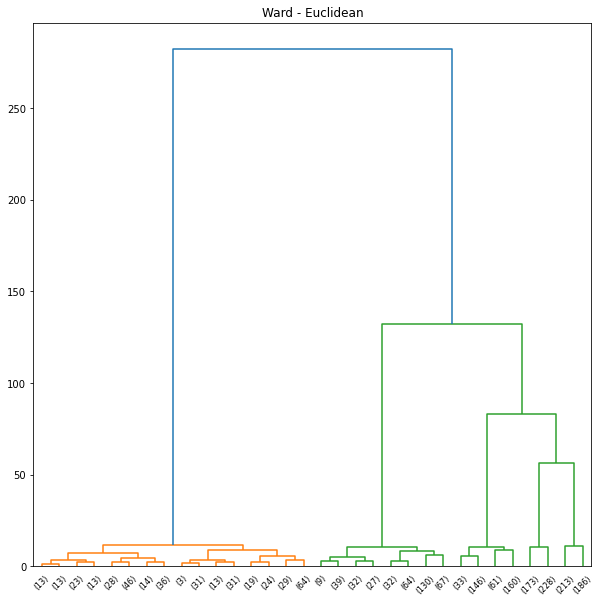

In [12]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title("Ward - Euclidean")
# plot the top fours levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p = 4)
plt.show()


## How do we decide the linkage method?

**Maximum or complete linkage:** The distance between two clusters is defined as the maximum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2. It tends to produce more compact clusters.

**Minimum or single linkage:** The distance between two clusters is defined as the minimum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2. It tends to produce long, “loose” clusters.

**Mean or average linkage:** The distance between two clusters is defined as the average distance between the elements in cluster 1 and the elements in cluster 2.

**Centroid linkage:** The distance between two clusters is defined as the distance between the centroid for cluster 1 (a mean vector of length p variables) and the centroid for cluster 2.

**Ward’s minimum variance method:** It minimizes the total within-cluster variance. At each step the pair of clusters with minimum between-cluster distance are merged.

Complete linkage and Ward’s method are generally preferred.


In [25]:
# Does agglomerative correctly detect ellipsoid clusters?

In [26]:
X, y = make_moons(n_samples = 5000, noise = 0.1)
np.shape(X), np.shape(y)

((5000, 2), (5000,))

<AxesSubplot:xlabel='xaxis', ylabel='yaxis'>

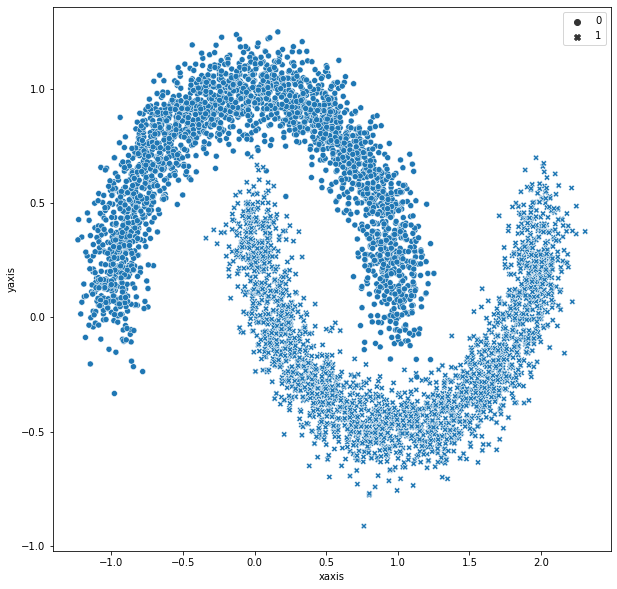

In [27]:
plt.rcParams["figure.figsize"] = [10, 10]
data_df = pd.DataFrame(X, columns = ['xaxis', 'yaxis'])
sns.scatterplot(data=data_df, x="xaxis", y="yaxis", style= y)

In [28]:
ac = AgglomerativeClustering(linkage = 'ward', n_clusters = 2)
ac.fit(X)

AgglomerativeClustering()

<AxesSubplot:xlabel='xaxis', ylabel='yaxis'>

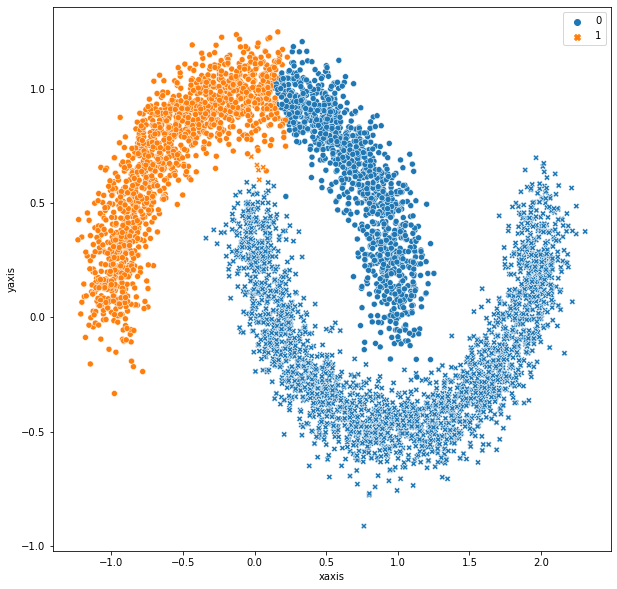

In [29]:
sns.scatterplot(data=data_df, x="xaxis", y="yaxis", hue= ac.labels_ , style=y)